In [1]:
!git clone https://github.com/YerevaNN/mimic3-benchmarks/

Cloning into 'mimic3-benchmarks'...
remote: Enumerating objects: 1716, done.
remote: Total 1716 (delta 0), reused 0 (delta 0), pack-reused 1716
Receiving objects: 100% (1716/1716), 11.24 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (1221/1221), done.


In [1]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 26 kB/s s eta 0:00:01     |███████████████████████████████▋| 164.7 MB 69.1 MB/s eta 0:00:01


In [2]:
!pip install shap

     |████████████████████████████████| 356 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 565 kB/s  eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp36-cp36m-linux_x86_64.whl size=481365 sha256=2efb43ec6ac3141dcba75dc0c7b97d13fc2db87adad255a2c0fb48f1fdade01a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6f/08/25/2992725334291786ea084e06cac493d93049b80e3470318a1b
Successfully built shap


In [3]:
import pickle
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dateutil.relativedelta import relativedelta
def SASDateConvert(inputSeries):
    return pd.DatetimeIndex(pd.to_datetime(inputSeries,format='%d%b%Y:%H:%M:%S.%f')).normalize()

import statsmodels.api as sm

def SASDateNoTimeConvert(inputSeries):
    return pd.DatetimeIndex(pd.to_datetime(inputSeries,format='%d%b%Y')).normalize()


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import xgboost as xgb
import gc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.exceptions import NotFittedError


In [14]:
item_map.to_csv('item_map.csv')

In [17]:
import boto3

s3 = boto3.resource('s3')
s3.meta.client.upload_file('item_map.csv', 'aws-athena-query-results-441066871063-us-east-1', 'item_map.csv')

TypeError: upload_file() got an unexpected keyword argument 'header'

In [4]:
import boto3
import io


In [ ]:
#Read in data from spark dataframe

In [14]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('aws-athena-query-results-441066871063-us-east-1')
prefix_objs = bucket.objects.filter(Prefix="all_columns/part-")
prefix_df = pd.DataFrame()

for obj in prefix_objs:
    key = obj.key
    body = obj.get()['Body'].read()
    temp = pd.read_csv(io.BytesIO(body), encoding='utf8')        
    prefix_df = pd.concat([prefix_df,temp], axis = 0)

In [16]:
prefix_df = prefix_df.reset_index()

In [35]:
prefix_df.to_pickle('patient_data.pkl')

In [22]:
prefix_df.columns

Index(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS', 'AGE', 'Capillary_refill_rate__VALUENUM_min',
       'Capillary_refill_rate__percent_change',
       'Diastolic_blood_pressure__VALUENUM_min',
       'Diastolic_blood_pressure__percent_change',
       'Fraction_inspired_oxygen__VALUENUM_min',
       'Fraction_inspired_oxygen__percent_change',
       'Glascow_coma_scale_eye_opening__VALUENUM_min',
       'Glascow_coma_scale_eye_opening__percent_change',
       'Glascow_coma_scale_motor_response__VALUENUM_min',
       'Glascow_coma_scale_motor_response__percent_change',
       'Glascow_coma_scale_total__VALUENUM_min',
       'Glascow_coma_scale_total__percent_change',
       'Glascow_coma_scale_verbal_response__VALUENUM_min',
       'Glascow_coma_scale_verbal_response__percent_change',
       'Glucose__VALUENUM_min', 'Glucose__percent_change',
       'Heart_Rate__VALUENUM_min', 'Heart_Rate__percent_change',
       'Height__VALUENUM

In [ ]:
#read in 

In [ ]:
def read_icd_diagnoses_table(mimic3_path):
    codes = dataframe_from_csv(os.path.join(mimic3_path, 'D_ICD_DIAGNOSES.csv'))
    codes = codes[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']]
    diagnoses = dataframe_from_csv(os.path.join(mimic3_path, 'DIAGNOSES_ICD.csv'))
    diagnoses = diagnoses.merge(codes, how='inner', left_on='ICD9_CODE', right_on='ICD9_CODE')
    diagnoses[['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM']] = diagnoses[['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM']].astype(int)
    return diagnoses


In [97]:
prefix_df.update(prefix_df[['Asian', 'Black', 'Hispanic', 'Other_Eth', 'Unknown', 'White',
       'Catholic', 'Episcopalian', 'Jewish', 'Other_Rel', 'ProtestantQuaker',
       'Unknown_Rel', 'Divorced', 'Married', 'Other_Mar', 'Separated',
       'Single', 'Widowed', 'F', 'M', 'Government', 'Medicaid', 'Medicare',
       'Private', 'Self Pay']].fillna(0))

In [100]:
prefix_df[['Capillary_refill_rate__VALUENUM_min','Asian', 'Black', 'Hispanic', 'Other_Eth', 'Unknown', 'White',
       'Catholic', 'Episcopalian', 'Jewish', 'Other_Rel', 'ProtestantQuaker',
       'Unknown_Rel', 'Divorced', 'Married', 'Other_Mar', 'Separated',
       'Single', 'Widowed', 'F', 'M', 'Government', 'Medicaid', 'Medicare',
       'Private', 'Self Pay']]

,Capillary_refill_rate__VALUENUM_min,Asian,Black,Hispanic,Other_Eth,Unknown,White,Catholic,Episcopalian,Jewish,...,Separated,Single,Widowed,F,M,Government,Medicaid,Medicare,Private,Self Pay
0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28365,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28366,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28367,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28368,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
prefix_df.to_pickle('patient_data.pkl')

In [ ]:
#read in item map and save to s3 bucket

In [2]:
item_map = pd.read_csv('mimic3-benchmarks/mimic3benchmark/resources/itemid_to_variable_map.csv')

In [27]:
!pip install PyAthena

In [28]:
from pyathena import connect
#from pyathena.util import as_pandas
#from __future__ import print_function

# Import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import boto3
from botocore.client import ClientError
# below is used to print out pretty pandas dataframes
from IPython.display import display, HTML
%matplotlib inline


s3 = boto3.resource('s3')
client = boto3.client("sts")
account_id = client.get_caller_identity()["Account"]
my_session = boto3.session.Session()
region = my_session.region_name
athena_query_results_bucket = 'aws-athena-query-results-'+account_id+'-'+region

try:
    s3.meta.client.head_bucket(Bucket=athena_query_results_bucket)
except ClientError:
    bucket = s3.create_bucket(Bucket=athena_query_results_bucket)
    print('Creating bucket '+athena_query_results_bucket)
cursor = connect(s3_staging_dir='s3://'+athena_query_results_bucket+'/athena/temp').cursor()


# The Glue database name of your MIMIC-III parquet data
gluedatabase="mimiciii"

# location of the queries to generate aline specific materialized views
aline_path = './'

# location of the queries to generate materialized views from the MIMIC code repository
concepts_path = './concepts/'

In [ ]:
#read in diagnosis data to join to patient data

In [29]:
conn = connect(s3_staging_dir='s3://'+athena_query_results_bucket+'/athena/temp')

In [30]:
query = '''
SELECT * FROM mimiciii.DIAGNOSES_ICD
'''

In [31]:
diagnosis = pd.read_sql(query,conn)

In [46]:
diagnosis.columns = diagnosis.columns.str.upper()

In [47]:
diagnosis.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')

In [ ]:
#transform diagnosis data to use in model

In [56]:
diagnosis['ICD9_CODE3'] = diagnosis['ICD9_CODE'].astype(str).str[0:3]

In [71]:
count_diags = diagnosis.groupby(by=['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].nunique().to_frame()
count_diags = count_diags.reset_index(level=['SUBJECT_ID', 'HADM_ID']).rename(columns = {'ICD9_CODE':'ICD9_CODE_COUNT'})

In [72]:
count_diags

,SUBJECT_ID,HADM_ID,ICD9_CODE_COUNT
0,2,163353,3
1,3,145834,9
2,4,185777,9
3,5,178980,3
4,6,107064,8
...,...,...,...
58971,99985,176670,13
58972,99991,151118,17
58973,99992,197084,12
58974,99995,137810,17


In [63]:
diagnosis = diagnosis.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM'])

In [78]:
diagnosis.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE',
       'ICD9_CODE3'],
      dtype='object')

In [65]:
diagnosis.groupby(by=['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].head(1)

608       V3001
611        0389
620         042
629       V3000
632       40391
          ...  
648165     0389
648178    56211
648195     9999
648207     4414
648478    75612
Name: ICD9_CODE, Length: 58976, dtype: object

In [4]:
def one_hot_encode_with_limits(data,object_collist,limit=10):
    '''One Hot Encoding will transform categorical data to numeric, and group those not in the top [10 by default]'''
    for count, column in enumerate(object_collist):
        print (column)
        data[column+"_null"]=pd.isnull(data[column])
        topCols = list(pd.DataFrame(data.groupby(column).size())\
     .sort_values(0,ascending=False).reset_index()[column])[:limit]

        data.loc[data[column].isin(topCols)==False,column]='not_in_top'
        dummies = pd.get_dummies(data[column])
        data[[column+'_'+str(col) for col in list(dummies.columns)]] = dummies


        if column != 'ARRANGEMENT_ID':    
            del data[column]
            
    return data


In [79]:
df1hot = one_hot_encode_with_limits(diagnosis, object_collist = ['ICD9_CODE3'], limit = 60)

ICD9_CODE3


In [83]:
df1hot_groups = df1hot.groupby(['SUBJECT_ID', 'HADM_ID']).max()

In [87]:
df1hot_groups = df1hot_groups.reset_index(level=['SUBJECT_ID', 'HADM_ID'])

KeyError: 'Requested level (SUBJECT_ID) does not match index name (None)'

In [88]:
df1hot_groups = df1hot_groups.drop(columns = ['ROW_ID','ICD9_CODE'])

In [93]:
df1hot_groups = df1hot_groups.drop(columns = ['ICD9_CODE3_null'])

In [36]:
diagnosis.to_pickle('diagnosis.pkl')

In [ ]:
#join diagnosis and patient data

In [102]:
full_df = prefix_df.merge(df1hot_groups, how='left', on=['SUBJECT_ID', 'HADM_ID'])

In [21]:
full_df1 = full_df[full_df['LOS']*24 > 6]

In [117]:
full_df.to_pickle('full_df.pkl')

In [5]:
full_df = pd.read_pickle('full_df.pkl')

In [ ]:
#Join notes data to patient and diagnosis dataframe

In [6]:
notes= pd.read_csv('notes_sentiment_data.csv')

In [8]:
notes_df = notes[[ 'subject_id', 'hadm_id', 'notes_sentiment',
       'notes_sentiment_grouped']]

In [9]:
cluster = pd.read_csv('NotesClustering2.csv')

In [11]:
cluster_df = cluster[[ 'SUBJECT_ID', 'HADM_ID','CLUSTER']]

In [12]:
cluster_df = cluster_df.drop_duplicates(subset=['SUBJECT_ID', 'HADM_ID'], keep='first')

In [15]:
full_notes = pd.merge(full_df, notes_df,  how='left', left_on=['SUBJECT_ID', 'HADM_ID'], right_on = ['subject_id','hadm_id'])

In [16]:
full_cluster = pd.merge(full_notes, cluster_df,  how='left', left_on=['SUBJECT_ID', 'HADM_ID'], right_on = ['SUBJECT_ID', 'HADM_ID'])

In [19]:
full_cluster = full_cluster.drop(columns = ['subject_id','hadm_id'])

In [21]:
full_cluster = full_cluster[full_cluster['LOS']*24 > 6]

In [22]:
full_cluster = one_hot_encode_with_limits(full_cluster, object_collist = ['notes_sentiment_grouped'])

notes_sentiment_grouped


In [79]:
full_cluster.to_pickle('full_cluster.pkl')

In [ ]:
#Split into train and test datasets

In [26]:
target = full_cluster['LOS']
variables =full_cluster.drop(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS','notes_sentiment_grouped_null'],axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(variables, target, test_size = 0.3, random_state = 1992)


In [ ]:
#eliminate features with high missing data and high multicollinearity

In [25]:
fs = FeatureSelector(data = train_features, labels = train_labels)

3 features with greater than 0.90 missing values.



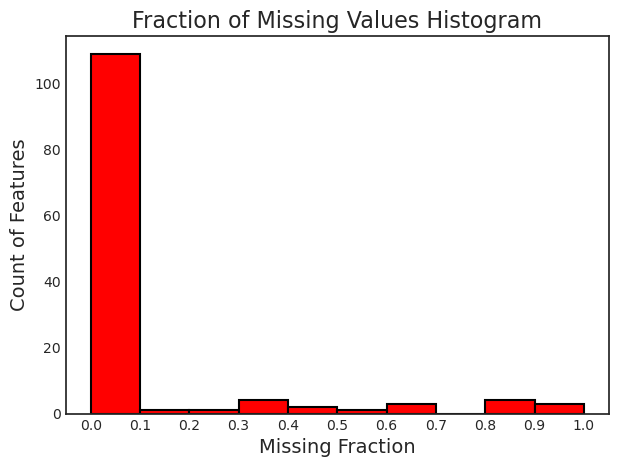

In [28]:
fs.identify_missing(missing_threshold=0.9)
fs.plot_missing()


In [30]:
missing_features = fs.ops['missing']
missing_features

['Capillary_refill_rate__VALUENUM_min',
 'Capillary_refill_rate__percent_change',
 'Height__percent_change']

In [38]:
fs.identify_collinear(correlation_threshold=0.99)
correlated_features = fs.ops['collinear']
correlated_features

2 features with a correlation magnitude greater than 0.99.



['M', 'notes_sentiment_grouped_not_in_top']

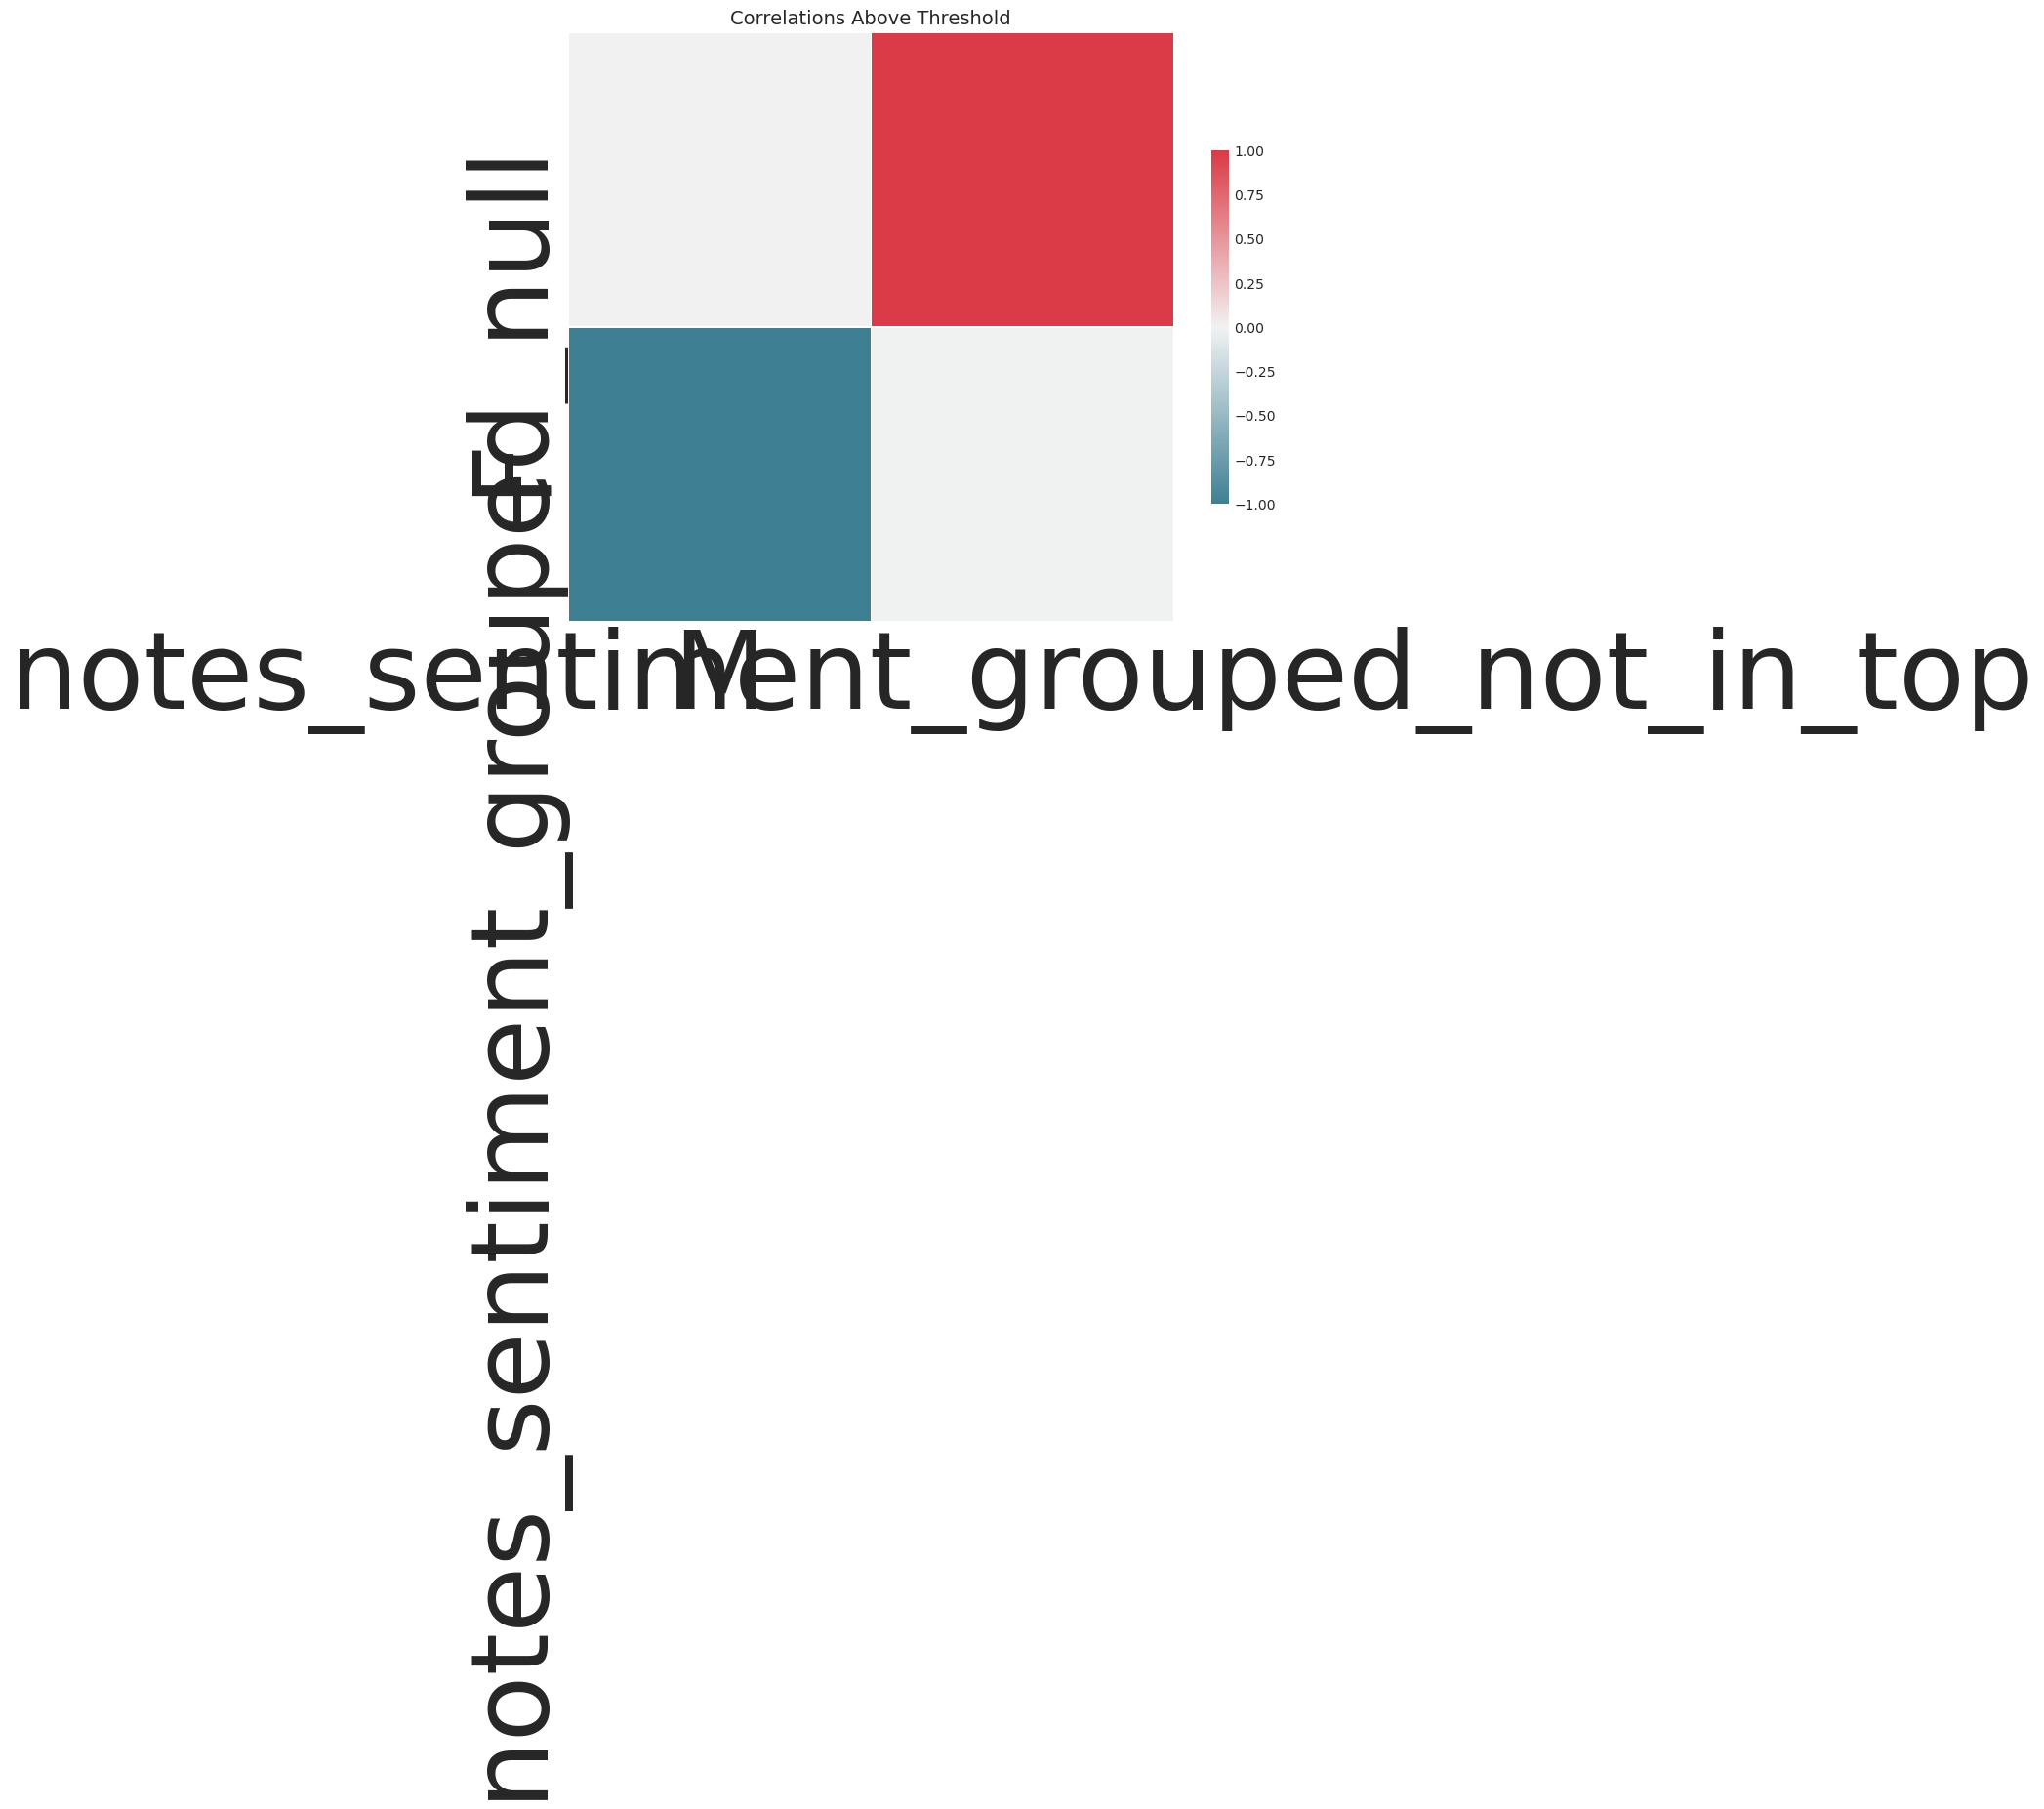

In [34]:
fs.plot_collinear()


In [27]:
train_features = train_features.drop(columns = ['Capillary_refill_rate__VALUENUM_min',
 'Capillary_refill_rate__percent_change',
 'Height__percent_change','M'])
test_features = test_features.drop(columns = ['Capillary_refill_rate__VALUENUM_min',
 'Capillary_refill_rate__percent_change',
 'Height__percent_change','M'])

In [ ]:
#Randomized search initialization for XGBoost model

In [52]:
#Define Parameters
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import KFold

mcw_high=21
mcw_low=1


mdepth_low=2
mdepth_high=7

#Original List
rlambdas = [0.001,0.01,0.05,0.5,1,10,20]
ralphas = [0.001,0.01,0.05,0.02,0.5,1,10,20]

gamma_high=14
gamma_low=0

#colsam_high=1
#colsam_low=0.5

etas_high=0.4
etas_low=0.01

n_est_high=500
n_est_low=25

n_iter_search=30
OUT=[]
training_auc=[]
test_auc=[]
oot_auc=[]

top4=[]
j=0


params={'min_child_weight':randint(mcw_low,mcw_high),
     'max_depth':randint(mdepth_low,mdepth_high),
     'reg_lambda':rlambdas,
     #'colsample_bylevel':uniform(colsam_low,colsam_high),
     'learning_rate':uniform(etas_low,etas_high-etas_low),
     'gamma':uniform(gamma_low,gamma_high-gamma_low),
     'reg_alpha':ralphas,
     'n_estimators':randint(n_est_low,n_est_high)   
       }


In [59]:
xgb_reg = xgb.XGBRegressor(n_jobs=4, objective='reg:squarederror',random_state=1992, importance_type='total_gain', eval_metric = 'mae')
kfold = KFold(n_splits=5)

In [32]:
randomized_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=n_iter_search, cv= kfold, verbose = 2, random_state=42)
model5 = randomized_search.fit(train_features,train_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  12.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  12.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  13.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=176, reg_alpha=0.05, reg_lambda=10; total time=   7.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=176, reg_alpha=0.05, reg_lambda=10; total time=   7.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=176, reg_alpha=0.05, reg_lambda=10; total time=   7.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  14.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  14.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  14.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time=  41.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time= 1.6min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time= 2.4min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=79, reg_alpha=0.02, reg_lambda=0.001; total time=   2.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=79, reg_alpha=0.02, reg_lambda=0.001; total time=   2.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=79, reg_alpha=0.02, reg_lambda=0.001; total time=   2.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time=  10.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time=  47.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time= 1.0min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time= 2.8min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time= 3.8min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=288, reg_alpha=10, reg_lambda=0.05; total time=  23.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=288, reg_alpha=10, reg_lambda=0.05; total time= 1.3min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=288, reg_alpha=10, reg_lambda=0.05; total time= 2.3min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.73048562910295, learning_rate=0.11092419282400659, max_depth=9, min_child_weight=4, n_estimators=26, reg_alpha=1, reg_lambda=10; total time=  13.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.73048562910295, learning_rate=0.11092419282400659, max_depth=9, min_child_weight=4, n_estimators=26, reg_alpha=1, reg_lambda=10; total time=  14.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.73048562910295, learning_rate=0.11092419282400659, max_depth=9, min_child_weight=4, n_estimators=26, reg_alpha=1, reg_lambda=10; total time=  14.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.911183280154644, learning_rate=0.2314031278497967, max_depth=3, min_child_weight=12, n_estimators=186, reg_alpha=0.01, reg_lambda=10; total time=  17.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.911183280154644, learning_rate=0.2314031278497967, max_depth=3, min_child_weight=12, n_estimators=186, reg_alpha=0.01, reg_lambda=10; total time=   4.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.911183280154644, learning_rate=0.2314031278497967, max_depth=3, min_child_weight=12, n_estimators=186, reg_alpha=0.01, reg_lambda=10; total time=   4.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.97322412111312, learning_rate=0.2936360783840042, max_depth=9, min_child_weight=14, n_estimators=239, reg_alpha=0.02, reg_lambda=0.001; total time=  19.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.97322412111312, learning_rate=0.2936360783840042, max_depth=9, min_child_weight=14, n_estimators=239, reg_alpha=0.02, reg_lambda=0.001; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=12.97322412111312, learning_rate=0.2936360783840042, max_depth=9, min_child_weight=14, n_estimators=239, reg_alpha=0.02, reg_lambda=0.001; total time= 1.7min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=  21.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=  11.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=  11.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=325, reg_alpha=0.001, reg_lambda=0.001; total time= 1.3min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=325, reg_alpha=0.001, reg_lambda=0.001; total time=  51.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=325, reg_alpha=0.001, reg_lambda=0.001; total time= 2.8min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=105, reg_alpha=20, reg_lambda=0.05; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=105, reg_alpha=20, reg_lambda=0.05; total time=   9.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=105, reg_alpha=20, reg_lambda=0.05; total time=  10.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=   7.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=   7.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=  27.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=431, reg_alpha=1, reg_lambda=1; total time=  48.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=431, reg_alpha=1, reg_lambda=1; total time=  55.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=431, reg_alpha=1, reg_lambda=1; total time=  46.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=10.214486496732897, learning_rate=0.2586474138285331, max_depth=4, min_child_weight=1, n_estimators=251, reg_alpha=0.5, reg_lambda=20; total time=  51.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=10.214486496732897, learning_rate=0.2586474138285331, max_depth=4, min_child_weight=1, n_estimators=251, reg_alpha=0.5, reg_lambda=20; total time=  36.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=10.214486496732897, learning_rate=0.2586474138285331, max_depth=4, min_child_weight=1, n_estimators=251, reg_alpha=0.5, reg_lambda=20; total time=   8.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.98542702112193, learning_rate=0.30670616896059, max_depth=11, min_child_weight=14, n_estimators=383, reg_alpha=0.05, reg_lambda=0.001; total time= 1.4min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.98542702112193, learning_rate=0.30670616896059, max_depth=11, min_child_weight=14, n_estimators=383, reg_alpha=0.05, reg_lambda=0.001; total time= 3.5min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.98542702112193, learning_rate=0.30670616896059, max_depth=11, min_child_weight=14, n_estimators=383, reg_alpha=0.05, reg_lambda=0.001; total time=  35.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=  58.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=  54.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=  56.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=261, reg_alpha=10, reg_lambda=0.05; total time= 1.6min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=261, reg_alpha=10, reg_lambda=0.05; total time=  20.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=261, reg_alpha=10, reg_lambda=0.05; total time=  54.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time=  47.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time=  51.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=308, reg_alpha=0.02, reg_lambda=0.5; total time= 1.0min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=308, reg_alpha=0.02, reg_lambda=0.5; total time=  17.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=308, reg_alpha=0.02, reg_lambda=0.5; total time=  19.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time= 2.0min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time= 1.9min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  37.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  11.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  14.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time= 1.6min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time= 1.6min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  17.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=9, min_child_weight=9, n_estimators=204, reg_alpha=0.001, reg_lambda=10; total time=  18.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=9, min_child_weight=9, n_estimators=204, reg_alpha=0.001, reg_lambda=10; total time= 1.3min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=9, min_child_weight=9, n_estimators=204, reg_alpha=0.001, reg_lambda=10; total time= 1.7min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.604949158093449, learning_rate=0.3853544450274234, max_depth=8, min_child_weight=2, n_estimators=411, reg_alpha=0.001, reg_lambda=1; total time= 1.6min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.604949158093449, learning_rate=0.3853544450274234, max_depth=8, min_child_weight=2, n_estimators=411, reg_alpha=0.001, reg_lambda=1; total time=  40.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.604949158093449, learning_rate=0.3853544450274234, max_depth=8, min_child_weight=2, n_estimators=411, reg_alpha=0.001, reg_lambda=1; total time= 2.5min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.9877669212845466, learning_rate=0.02438590946826779, max_depth=2, min_child_weight=2, n_estimators=154, reg_alpha=0.02, reg_lambda=10; total time=  19.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.9877669212845466, learning_rate=0.02438590946826779, max_depth=2, min_child_weight=2, n_estimators=154, reg_alpha=0.02, reg_lambda=10; total time=  15.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.9877669212845466, learning_rate=0.02438590946826779, max_depth=2, min_child_weight=2, n_estimators=154, reg_alpha=0.02, reg_lambda=10; total time=  14.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.4627102606076774, learning_rate=0.1445777867304064, max_depth=2, min_child_weight=19, n_estimators=150, reg_alpha=0.01, reg_lambda=1; total time=  14.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.4627102606076774, learning_rate=0.1445777867304064, max_depth=2, min_child_weight=19, n_estimators=150, reg_alpha=0.01, reg_lambda=1; total time=  14.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.4627102606076774, learning_rate=0.1445777867304064, max_depth=2, min_child_weight=19, n_estimators=150, reg_alpha=0.01, reg_lambda=1; total time=  14.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=6.852338643885882, learning_rate=0.3944036771031343, max_depth=8, min_child_weight=4, n_estimators=463, reg_alpha=0.05, reg_lambda=0.05; total time=  36.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=6.852338643885882, learning_rate=0.3944036771031343, max_depth=8, min_child_weight=4, n_estimators=463, reg_alpha=0.05, reg_lambda=0.05; total time= 2.2min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=6.852338643885882, learning_rate=0.3944036771031343, max_depth=8, min_child_weight=4, n_estimators=463, reg_alpha=0.05, reg_lambda=0.05; total time= 2.4min


In [33]:
#initial model performance

In [34]:
predictions_train =model5.best_estimator_.predict(train_features)
predictions_test =model5.best_estimator_.predict(test_features)
print('Train R-square=',r2_score(train_labels,predictions_train))
print('Test R-square=',r2_score(test_labels,predictions_test))


Train R-square= 0.5138892194608525
Test R-square= 0.3507173776935153


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [35]:
print('Train MAE=',mean_absolute_error(train_labels,predictions_train))
print('Test MAE=',mean_absolute_error(test_labels,predictions_test))

Train MAE= 1.949657059953962
Test MAE= 2.1762609866879994


In [36]:
print('Train MSE=',mean_squared_error(train_labels,predictions_train))
print('Test MSE=',mean_squared_error(test_labels,predictions_test))

Train MSE= 12.563925391424236
Test MSE= 17.50734407217883


In [ ]:
#Performance plots

Text(0.5, 1.0, 'Actual vs Predicted LOS- Train Data')

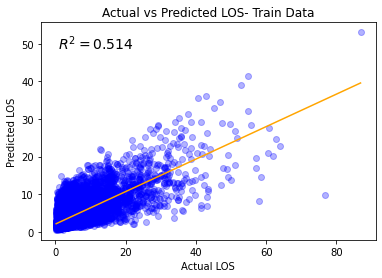

In [37]:
plt.scatter(train_labels, predictions_train, c="blue", alpha=0.3)
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.plot(np.unique(train_labels), np.poly1d(np.polyfit(train_labels, predictions_train, 1))(np.unique(train_labels)), c='orange')
text = f"$R^2 = {r2_score(train_labels,predictions_train):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.title("Actual vs Predicted LOS- Train Data")

In [38]:
def dist(yt,yhat,model):
    num_bins =300
    fig = plt.figure(figsize=(15,3))
    x1=yt
    x2=yhat
    n, bins, patches = plt.hist(x1, num_bins, range=[x1.min(), x1.max()], color='Green', edgecolor='Green' , alpha=0.5, label='Actual_'+model)
    n, bins, patches = plt.hist(x2, num_bins, range=[x1.min(), x1.max()], color='Blue', edgecolor='Blue', fc='None', alpha=0.5, label='Predict_'+model)
    plt.ylabel('ICU Stay Counts')
    plt.xlabel("ICU Length of Stay (Days)")
    plt.title("Distribution of Actual vs Predicted LOS Estimates: "+ model)
    plt.xlim((0, 20))
    plt.legend(loc='upper right')
    plt.show()
    return plt.show()

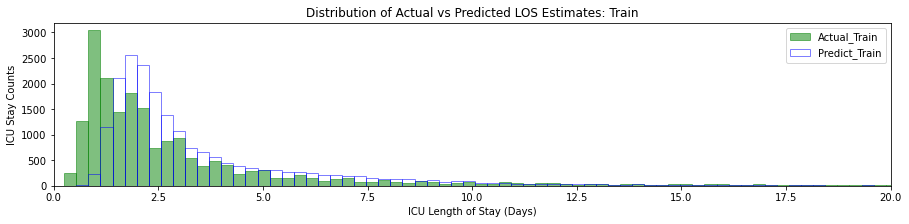

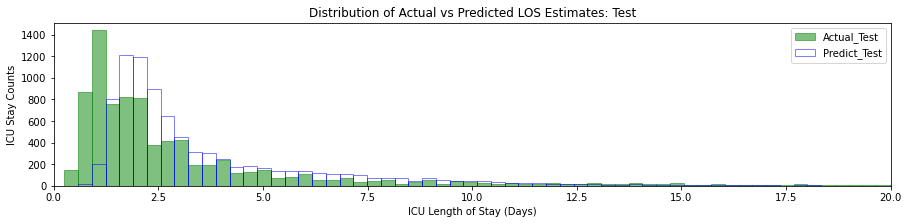

In [39]:
dist(train_labels,predictions_train , model = 'Train')
dist(test_labels,predictions_test , model = 'Test')

In [40]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


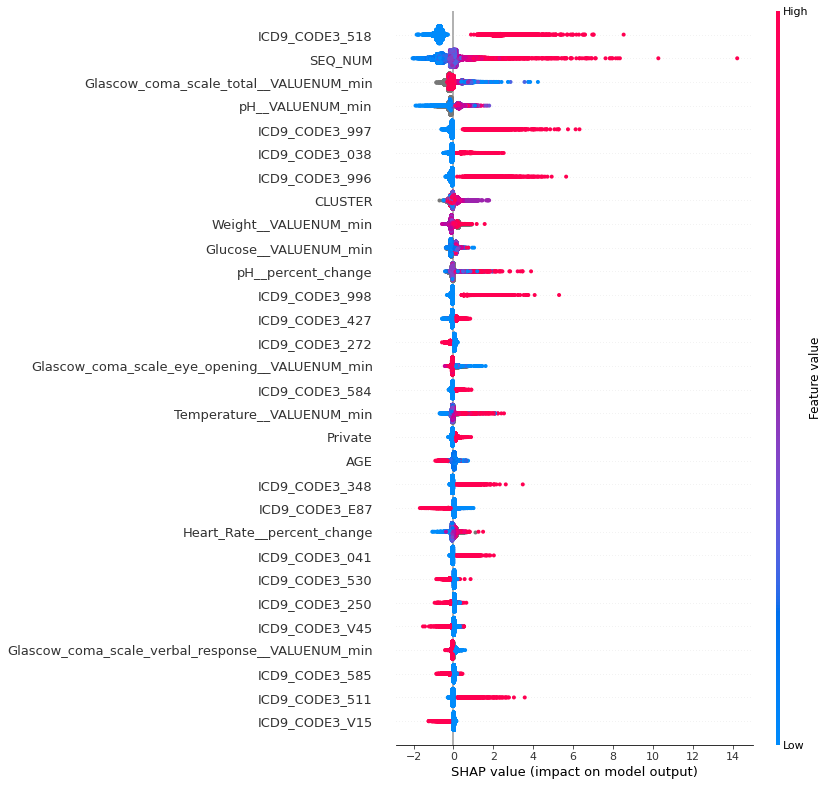

In [42]:
# Compute the SHAP values for every prediction in the train dataset
explainer = shap.TreeExplainer(model5.best_estimator_)
shap_values = explainer.shap_values(train_features)
plot = shap.summary_plot(shap_values,train_features, max_display=30, plot_type='dot')

In [43]:
model5.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=9.949280455601023,
             gpu_id=-1, importance_type='total_gain',
             interaction_constraints='', learning_rate=0.05324742011661422,
             max_delta_step=0, max_depth=4, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=265, n_jobs=4,
             num_parallel_tree=1, random_state=1992, reg_alpha=0.02,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
#Feature Reduction

In [45]:
features = train_features.columns

In [47]:
x=model5.best_estimator_.get_booster().get_score(importance_type='total_gain')
impt=pd.DataFrame(data={'Feature_total_gain':list(x.keys()),'imp_metrics_total_gain':list(x.values())})
Importances=pd.DataFrame(data={'Feature_total_gain':features})
Importances=Importances.merge(impt,on='Feature_total_gain')    
Imp_top50=Importances.sort_values(by='imp_metrics_total_gain',ascending=False).reset_index(drop=True)

In [48]:
features_totalgain=Imp_top50[['Feature_total_gain','imp_metrics_total_gain']]
features_totalgain['cum_sum'] = features_totalgain['imp_metrics_total_gain'].cumsum()
features_totalgain['cum_perc'] = (100*features_totalgain['cum_sum']/features_totalgain['imp_metrics_total_gain'].sum()).apply(lambda s: round(s,2))

69 features required for 99.00 of cumulative importance


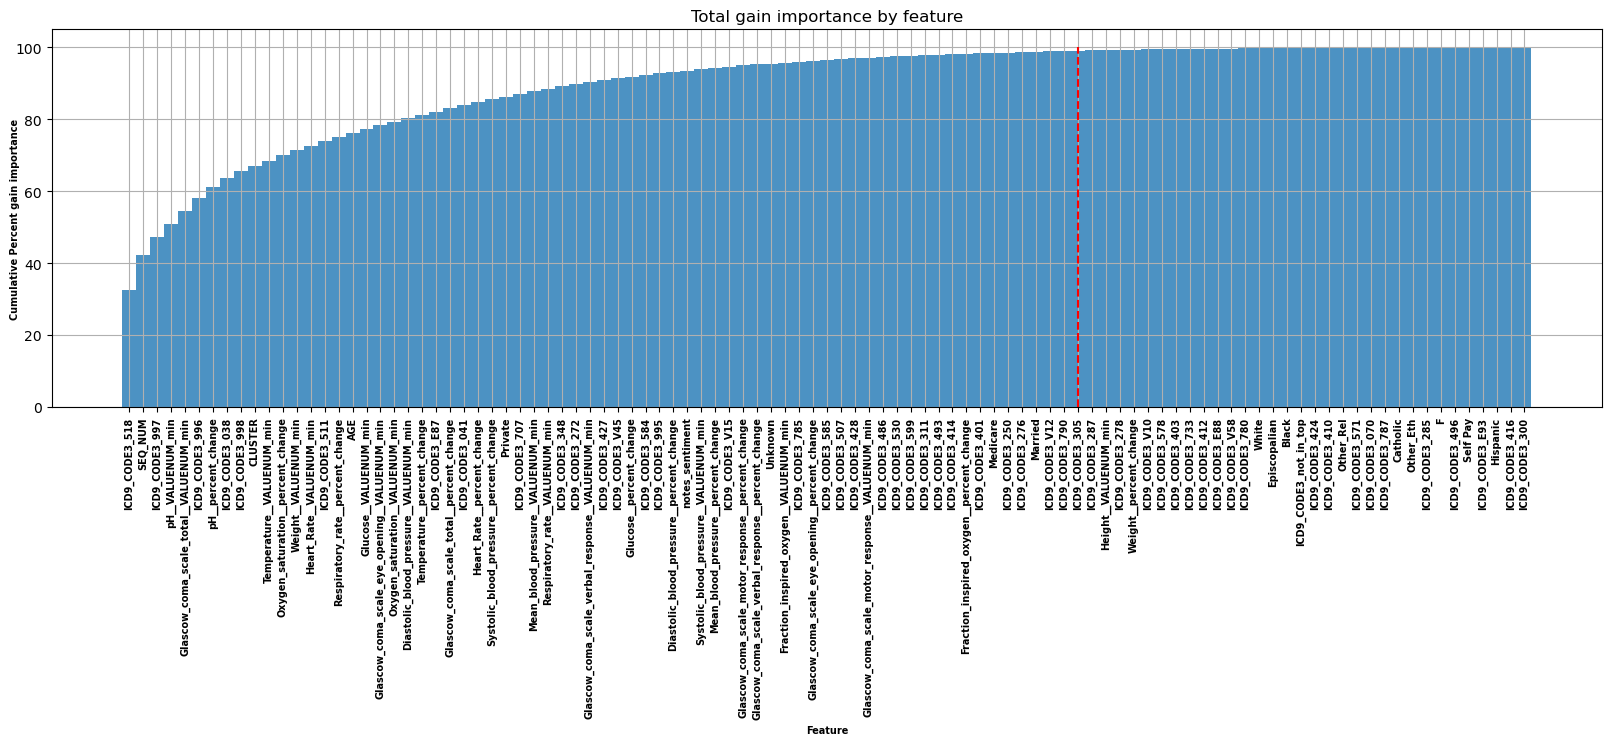

In [49]:
threshold=99
plt.rcParams = plt.rcParamsDefault
plt.figure(figsize = (20, 5))
index = np.arange(len(features_totalgain['Feature_total_gain']))
plt.bar(features_totalgain['Feature_total_gain'], features_totalgain.cum_perc, align='center', alpha=0.8,width=1)
plt.grid()
plt.title('Total gain importance by feature')
plt.xlabel('Feature', fontsize=7,fontweight='bold', va='top')
plt.ylabel('Cumulative Percent gain importance', fontsize=7, fontweight='bold', va='top')
plt.xticks(index,features_totalgain['Feature_total_gain'], fontsize=7,fontweight='bold', rotation=90, va='top')
importance_index = np.min(np.where(features_totalgain.cum_perc > threshold))
plt.vlines(x = list(features_totalgain['Feature_total_gain'])[importance_index], ymin = 0, ymax = 100, linestyles='--', colors = 'red')
print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))


In [50]:
columns_68 = Imp_top50[:68]['Feature_total_gain']

In [51]:
train_features68 = train_features[columns_68]
test_features68 = test_features[columns_68]

In [ ]:
#Model with reduced features

In [ ]:
randomized_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=n_iter_search, cv= kfold, verbose = 2, random_state=42)
model2 = randomized_search.fit(train_features68,train_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=  28.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=  28.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   6.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  10.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  11.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=   9.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  17.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time= 1.2min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time= 1.3min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time= 1.2min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time=  28.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time=  14.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=   9.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  22.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  55.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time=  55.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time=  55.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time= 1.1min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=  13.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time=  15.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time=  16.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time= 1.2min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   5.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   6.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   5.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  41.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  33.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  32.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  30.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  29.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  10.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   1.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   2.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   1.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=   2.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=   2.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=   2.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=   7.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  10.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  39.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=  40.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=  40.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=  46.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  43.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  43.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=   9.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time=  17.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time=  28.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time= 1.7min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=  31.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=  31.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=  31.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=   9.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=  13.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=   9.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   5.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   5.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   5.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   4.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   1.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   1.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  11.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  11.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  12.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  24.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  35.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  35.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  50.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  43.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  43.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  36.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  14.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  13.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   2.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   2.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   3.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  12.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  13.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  13.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  24.3s


In [56]:
train_features68.shape

(19835, 68)

In [57]:
predictions_train68 =model2.best_estimator_.predict(train_features68)
predictions_test68 =model2.best_estimator_.predict(test_features68)
print('Train R-square=',r2_score(train_labels,predictions_train68))
print('Test R-square=',r2_score(test_labels,predictions_test68))


Train R-square= 0.6013102091470799
Test R-square= 0.35265712489080314


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


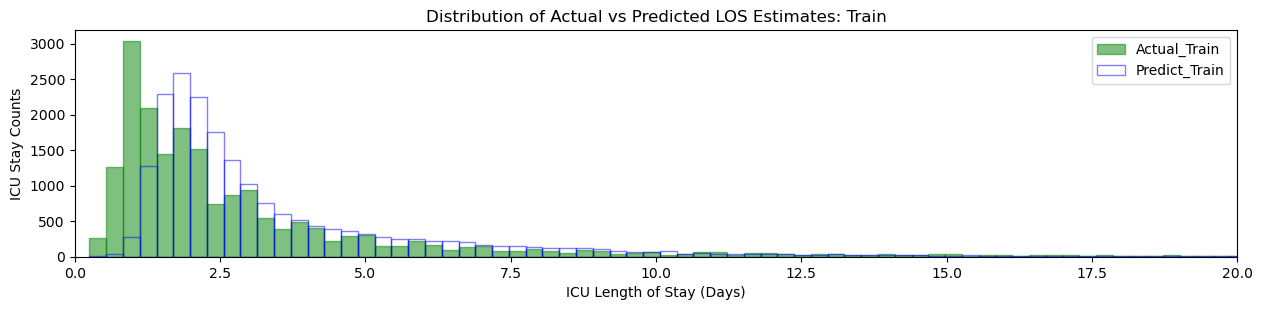

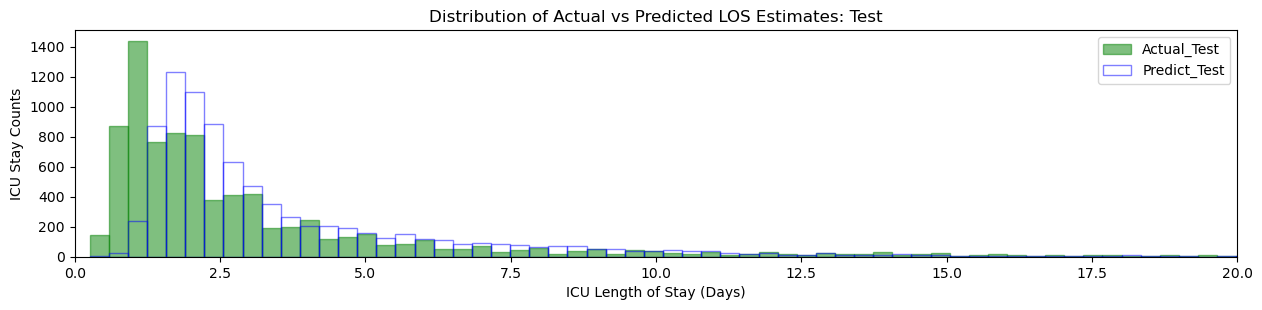

In [80]:
dist(train_labels,predictions_train68 , model = 'Train')
dist(test_labels,predictions_test68 , model = 'Test')

In [60]:
features = train_features68.columns

In [61]:
x=model2.best_estimator_.get_booster().get_score(importance_type='total_gain')
impt=pd.DataFrame(data={'Feature_total_gain':list(x.keys()),'imp_metrics_total_gain':list(x.values())})
Importances=pd.DataFrame(data={'Feature_total_gain':features})
Importances=Importances.merge(impt,on='Feature_total_gain')    
Imp_top50=Importances.sort_values(by='imp_metrics_total_gain',ascending=False).reset_index(drop=True)

In [62]:
features_totalgain=Imp_top50[['Feature_total_gain','imp_metrics_total_gain']]
features_totalgain['cum_sum'] = features_totalgain['imp_metrics_total_gain'].cumsum()
features_totalgain['cum_perc'] = (100*features_totalgain['cum_sum']/features_totalgain['imp_metrics_total_gain'].sum()).apply(lambda s: round(s,2))

61 features required for 99.00 of cumulative importance


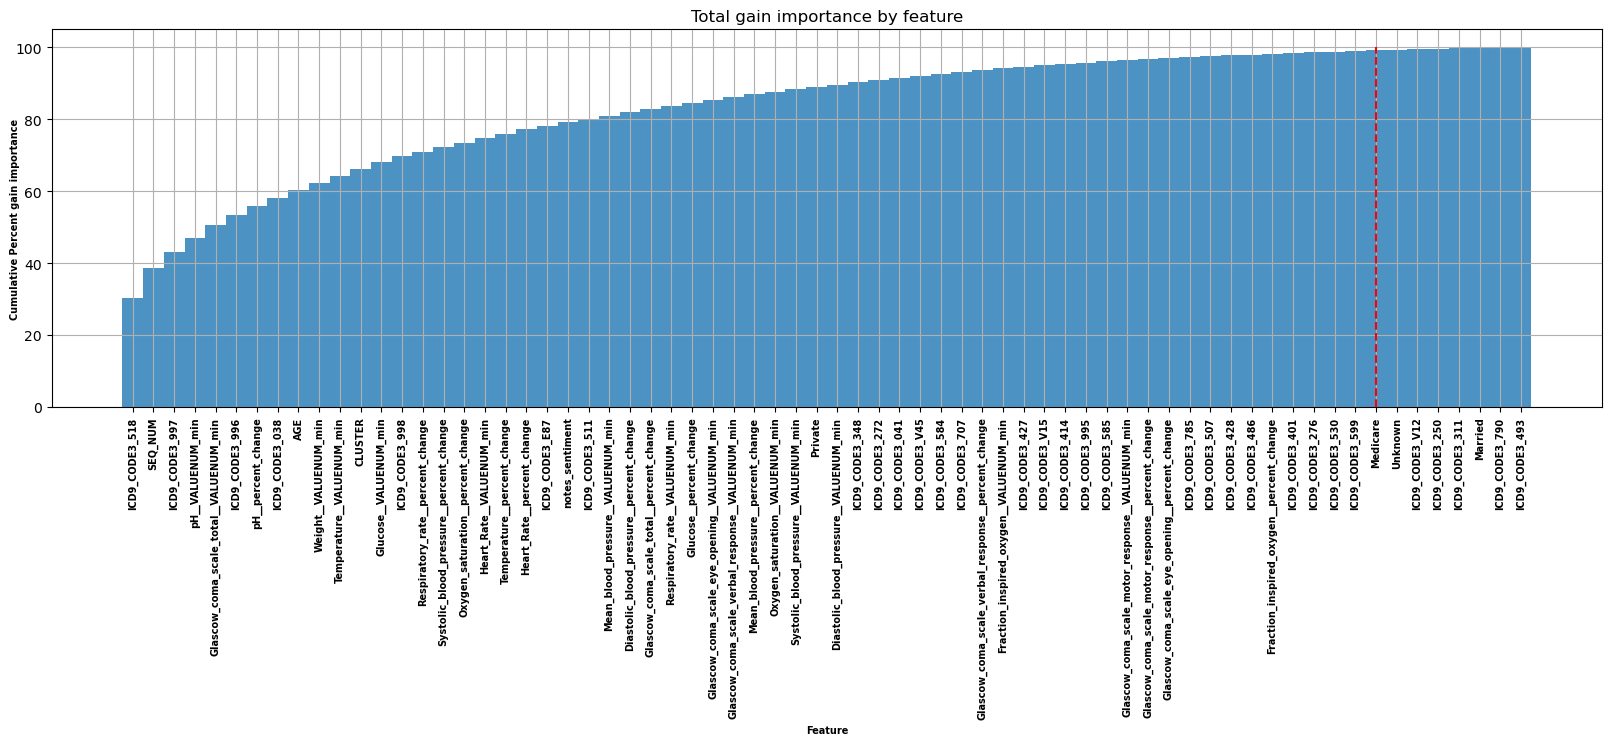

In [63]:
threshold=99
plt.rcParams = plt.rcParamsDefault
plt.figure(figsize = (20, 5))
index = np.arange(len(features_totalgain['Feature_total_gain']))
plt.bar(features_totalgain['Feature_total_gain'], features_totalgain.cum_perc, align='center', alpha=0.8,width=1)
plt.grid()
plt.title('Total gain importance by feature')
plt.xlabel('Feature', fontsize=7,fontweight='bold', va='top')
plt.ylabel('Cumulative Percent gain importance', fontsize=7, fontweight='bold', va='top')
plt.xticks(index,features_totalgain['Feature_total_gain'], fontsize=7,fontweight='bold', rotation=90, va='top')
importance_index = np.min(np.where(features_totalgain.cum_perc > threshold))
plt.vlines(x = list(features_totalgain['Feature_total_gain'])[importance_index], ymin = 0, ymax = 100, linestyles='--', colors = 'red')
print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))


In [64]:
columns_61 = Imp_top50[:61]['Feature_total_gain']

In [66]:
columns_61

0                             ICD9_CODE3_518
1                                    SEQ_NUM
2                             ICD9_CODE3_997
3                           pH__VALUENUM_min
4     Glascow_coma_scale_total__VALUENUM_min
                       ...                  
56                            ICD9_CODE3_401
57                            ICD9_CODE3_276
58                            ICD9_CODE3_530
59                            ICD9_CODE3_599
60                                  Medicare
Name: Feature_total_gain, Length: 61, dtype: object

In [65]:
train_features61 = train_features[columns_61]
test_features61 = test_features[columns_61]

In [67]:
randomized_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=n_iter_search, cv= kfold, verbose = 2, random_state=42)
model3 = randomized_search.fit(train_features61,train_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   5.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   5.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   5.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   5.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   6.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  12.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  10.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  10.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  10.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=  10.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  15.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  15.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  15.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  15.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  15.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time=  15.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time=  15.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time=  24.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time= 1.4min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.5676631379480734, learning_rate=0.1286544747542197, max_depth=6, min_child_weight=12, n_estimators=369, reg_alpha=0.001, reg_lambda=0.05; total time= 1.3min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  57.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  10.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  10.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  10.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=8.565940526113312, learning_rate=0.06440260565429631, max_depth=5, min_child_weight=16, n_estimators=295, reg_alpha=1, reg_lambda=10; total time=  19.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time= 1.1min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time= 1.2min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time= 1.1min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time=  49.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.99246345950219, learning_rate=0.08787277504176029, max_depth=5, min_child_weight=3, n_estimators=331, reg_alpha=10, reg_lambda=1; total time=  12.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   4.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.306989527573602, learning_rate=0.015173334852347946, max_depth=2, min_child_weight=14, n_estimators=266, reg_alpha=0.01, reg_lambda=0.001; total time=   3.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time= 1.2min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time= 1.6min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time= 1.5min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time=  19.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.22352753108299872, learning_rate=0.1000485919926381, max_depth=5, min_child_weight=15, n_estimators=468, reg_alpha=10, reg_lambda=0.5; total time=  16.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   1.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   1.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   1.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   1.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.932476741557783, learning_rate=0.023411523234935176, max_depth=2, min_child_weight=4, n_estimators=74, reg_alpha=20, reg_lambda=0.5; total time=   1.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  27.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  42.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  37.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  36.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.363955065251753, learning_rate=0.21282652825934623, max_depth=3, min_child_weight=4, n_estimators=334, reg_alpha=0.5, reg_lambda=20; total time=  36.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  32.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  39.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=  12.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=   6.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.79198684432998, learning_rate=0.18540411201420862, max_depth=3, min_child_weight=4, n_estimators=294, reg_alpha=10, reg_lambda=20; total time=   6.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.238895028726873, learning_rate=0.08643331634346663, max_depth=2, min_child_weight=8, n_estimators=237, reg_alpha=20, reg_lambda=1; total time=   3.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   1.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   1.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   1.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   2.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.798886444834543, learning_rate=0.33320762856925246, max_depth=3, min_child_weight=13, n_estimators=65, reg_alpha=0.5, reg_lambda=20; total time=   2.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=  10.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=  12.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=  12.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=  12.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.313737146882035, learning_rate=0.016098198629065634, max_depth=2, min_child_weight=1, n_estimators=160, reg_alpha=20, reg_lambda=20; total time=  12.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  53.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  46.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  46.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  44.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=11.416459998367678, learning_rate=0.2856743641005707, max_depth=4, min_child_weight=3, n_estimators=313, reg_alpha=0.05, reg_lambda=1; total time=  14.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=   9.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=   8.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=   8.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=  17.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.968212299186886, learning_rate=0.26392003994575836, max_depth=5, min_child_weight=7, n_estimators=225, reg_alpha=20, reg_lambda=0.5; total time=  44.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  49.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  48.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  56.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  48.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.632572347937089, learning_rate=0.03478775661154922, max_depth=6, min_child_weight=3, n_estimators=196, reg_alpha=20, reg_lambda=10; total time=  10.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time=  19.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time=  58.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time= 1.8min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time= 1.8min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=12.420978396068572, learning_rate=0.19416382081316025, max_depth=6, min_child_weight=15, n_estimators=486, reg_alpha=0.05, reg_lambda=0.001; total time=  19.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=   6.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=   6.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=   9.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=  33.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=10.104213296308226, learning_rate=0.10203411870209274, max_depth=4, min_child_weight=9, n_estimators=231, reg_alpha=10, reg_lambda=0.01; total time=  34.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=   9.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=   9.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=  11.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=  13.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.35586777441733264, learning_rate=0.05207765652738874, max_depth=2, min_child_weight=20, n_estimators=120, reg_alpha=0.02, reg_lambda=10; total time=  10.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   6.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   6.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   6.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   6.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.9506403616822596, learning_rate=0.24572277791834873, max_depth=4, min_child_weight=4, n_estimators=37, reg_alpha=20, reg_lambda=20; total time=   6.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   8.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   8.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   8.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   7.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=4.056520340792752, learning_rate=0.07287630202906172, max_depth=3, min_child_weight=10, n_estimators=69, reg_alpha=1, reg_lambda=0.001; total time=   8.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time= 1.1min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  12.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  14.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time=  16.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=1.4769196376237885, learning_rate=0.188048482488335, max_depth=5, min_child_weight=12, n_estimators=364, reg_alpha=1, reg_lambda=10; total time= 1.1min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  41.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  39.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  46.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  40.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=7.55079138681911, learning_rate=0.3249016605139844, max_depth=5, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  24.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=   9.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=   9.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=   9.0s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  10.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=257, reg_alpha=0.05, reg_lambda=20; total time=  47.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time= 1.3min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time= 1.3min


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  58.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  14.4s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=331, reg_alpha=0.01, reg_lambda=0.5; total time=  14.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   2.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   2.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   4.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=   9.8s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=2, min_child_weight=20, n_estimators=137, reg_alpha=1, reg_lambda=0.001; total time=  10.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  15.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  15.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  15.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  15.5s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.5548157950808257, learning_rate=0.10628166450705447, max_depth=3, min_child_weight=3, n_estimators=137, reg_alpha=0.5, reg_lambda=0.001; total time=  19.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  30.7s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  26.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  27.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  27.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=13.968366790685186, learning_rate=0.11404459556736114, max_depth=3, min_child_weight=2, n_estimators=244, reg_alpha=1, reg_lambda=20; total time=  27.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.90105049931256, learning_rate=0.36422369552699496, max_depth=4, min_child_weight=2, n_estimators=77, reg_alpha=0.02, reg_lambda=0.01; total time=  11.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.90105049931256, learning_rate=0.36422369552699496, max_depth=4, min_child_weight=2, n_estimators=77, reg_alpha=0.02, reg_lambda=0.01; total time=   4.6s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.90105049931256, learning_rate=0.36422369552699496, max_depth=4, min_child_weight=2, n_estimators=77, reg_alpha=0.02, reg_lambda=0.01; total time=   2.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.90105049931256, learning_rate=0.36422369552699496, max_depth=4, min_child_weight=2, n_estimators=77, reg_alpha=0.02, reg_lambda=0.01; total time=   2.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=3.90105049931256, learning_rate=0.36422369552699496, max_depth=4, min_child_weight=2, n_estimators=77, reg_alpha=0.02, reg_lambda=0.01; total time=   2.2s


In [68]:
predictions_train61 =model3.best_estimator_.predict(train_features61)
predictions_test61 =model3.best_estimator_.predict(test_features61)
print('Train R-square=',r2_score(train_labels,predictions_train61))
print('Test R-square=',r2_score(test_labels,predictions_test61))

Train R-square= 0.5905667135414213
Test R-square= 0.3466401945366794


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [69]:
features = train_features61.columns

In [70]:
x=model3.best_estimator_.get_booster().get_score(importance_type='total_gain')
impt=pd.DataFrame(data={'Feature_total_gain':list(x.keys()),'imp_metrics_total_gain':list(x.values())})
Importances=pd.DataFrame(data={'Feature_total_gain':features})
Importances=Importances.merge(impt,on='Feature_total_gain')    
Imp_top50=Importances.sort_values(by='imp_metrics_total_gain',ascending=False).reset_index(drop=True)

In [71]:
features_totalgain=Imp_top50[['Feature_total_gain','imp_metrics_total_gain']]
features_totalgain['cum_sum'] = features_totalgain['imp_metrics_total_gain'].cumsum()
features_totalgain['cum_perc'] = (100*features_totalgain['cum_sum']/features_totalgain['imp_metrics_total_gain'].sum()).apply(lambda s: round(s,2))

56 features required for 99.00 of cumulative importance


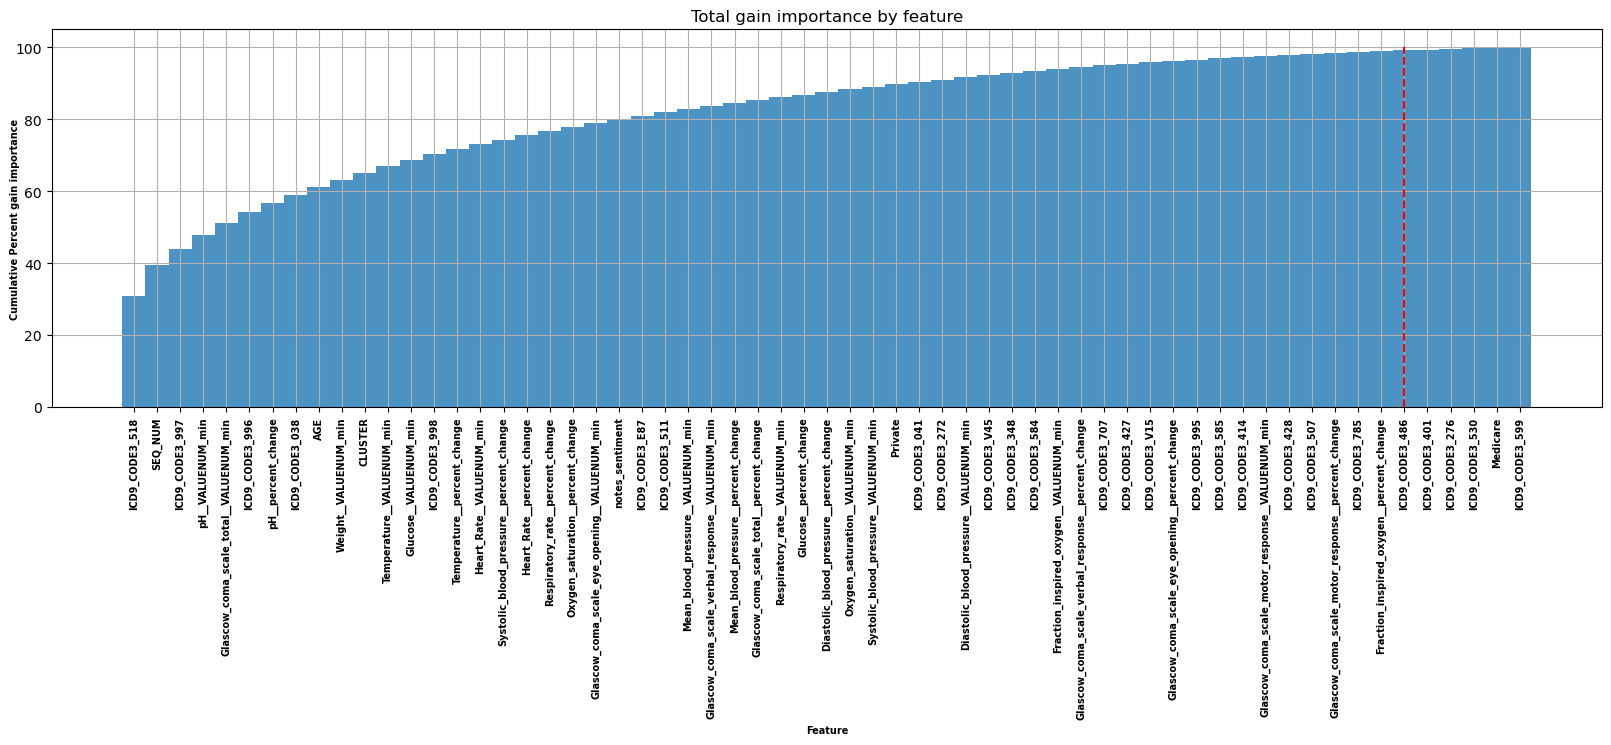

In [72]:
threshold=99
plt.rcParams = plt.rcParamsDefault
plt.figure(figsize = (20, 5))
index = np.arange(len(features_totalgain['Feature_total_gain']))
plt.bar(features_totalgain['Feature_total_gain'], features_totalgain.cum_perc, align='center', alpha=0.8,width=1)
plt.grid()
plt.title('Total gain importance by feature')
plt.xlabel('Feature', fontsize=7,fontweight='bold', va='top')
plt.ylabel('Cumulative Percent gain importance', fontsize=7, fontweight='bold', va='top')
plt.xticks(index,features_totalgain['Feature_total_gain'], fontsize=7,fontweight='bold', rotation=90, va='top')
importance_index = np.min(np.where(features_totalgain.cum_perc > threshold))
plt.vlines(x = list(features_totalgain['Feature_total_gain'])[importance_index], ymin = 0, ymax = 100, linestyles='--', colors = 'red')
print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))


In [73]:
columns_56 = Imp_top50[:56]['Feature_total_gain']

In [74]:
columns_56

0                                        ICD9_CODE3_518
1                                               SEQ_NUM
2                                        ICD9_CODE3_997
3                                      pH__VALUENUM_min
4                Glascow_coma_scale_total__VALUENUM_min
5                                        ICD9_CODE3_996
6                                    pH__percent_change
7                                        ICD9_CODE3_038
8                                                   AGE
9                                  Weight__VALUENUM_min
10                                              CLUSTER
11                            Temperature__VALUENUM_min
12                                Glucose__VALUENUM_min
13                                       ICD9_CODE3_998
14                          Temperature__percent_change
15                             Heart_Rate__VALUENUM_min
16              Systolic_blood_pressure__percent_change
17                           Heart_Rate__percent

In [81]:
columns_25 = Imp_top50[:25]['Feature_total_gain']

In [75]:
train_features56 = train_features[columns_56]
test_features56 = test_features[columns_56]

In [82]:
train_features25 = train_features[columns_25]
test_features25 = test_features[columns_25]

In [76]:
train_features56.columns

Index(['ICD9_CODE3_518', 'SEQ_NUM', 'ICD9_CODE3_997', 'pH__VALUENUM_min',
       'Glascow_coma_scale_total__VALUENUM_min', 'ICD9_CODE3_996',
       'pH__percent_change', 'ICD9_CODE3_038', 'AGE', 'Weight__VALUENUM_min',
       'CLUSTER', 'Temperature__VALUENUM_min', 'Glucose__VALUENUM_min',
       'ICD9_CODE3_998', 'Temperature__percent_change',
       'Heart_Rate__VALUENUM_min', 'Systolic_blood_pressure__percent_change',
       'Heart_Rate__percent_change', 'Respiratory_rate__percent_change',
       'Oxygen_saturation__percent_change',
       'Glascow_coma_scale_eye_opening__VALUENUM_min', 'notes_sentiment',
       'ICD9_CODE3_E87', 'ICD9_CODE3_511', 'Mean_blood_pressure__VALUENUM_min',
       'Glascow_coma_scale_verbal_response__VALUENUM_min',
       'Mean_blood_pressure__percent_change',
       'Glascow_coma_scale_total__percent_change',
       'Respiratory_rate__VALUENUM_min', 'Glucose__percent_change',
       'Diastolic_blood_pressure__percent_change',
       'Oxygen_saturation__VA

In [84]:
train_features25.columns

Index(['ICD9_CODE3_518', 'SEQ_NUM', 'ICD9_CODE3_997', 'pH__VALUENUM_min',
       'Glascow_coma_scale_total__VALUENUM_min', 'ICD9_CODE3_996',
       'pH__percent_change', 'ICD9_CODE3_038', 'AGE', 'Weight__VALUENUM_min',
       'CLUSTER', 'Temperature__VALUENUM_min', 'Glucose__VALUENUM_min',
       'ICD9_CODE3_998', 'Temperature__percent_change',
       'Heart_Rate__VALUENUM_min', 'Systolic_blood_pressure__percent_change',
       'Heart_Rate__percent_change', 'Respiratory_rate__percent_change',
       'Oxygen_saturation__percent_change',
       'Glascow_coma_scale_eye_opening__VALUENUM_min', 'notes_sentiment',
       'ICD9_CODE3_E87', 'ICD9_CODE3_511',
       'Mean_blood_pressure__VALUENUM_min'],
      dtype='object')

In [85]:
xgb_reg = xgb.XGBRegressor(n_jobs=4, objective='reg:squarederror',random_state=1992, importance_type='total_gain', eval_metric = 'mae')
kfold = KFold(n_splits=3)

In [86]:
randomized_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=n_iter_search, cv= kfold, verbose = 2, random_state=42)
model4 = randomized_search.fit(train_features25,train_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   3.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   3.2s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=4, min_child_weight=8, n_estimators=213, reg_alpha=0.5, reg_lambda=20; total time=   3.1s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=   5.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=   5.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=6.241658539950276, learning_rate=0.048990217169021126, max_depth=4, min_child_weight=4, n_estimators=384, reg_alpha=20, reg_lambda=0.05; total time=   6.9s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=  27.3s


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[CV] END gamma=0.28818292014123426, learning_rate=0.3882648423431778, max_depth=5, min_child_weight=6, n_estimators=410, reg_alpha=20, reg_lambda=0.5; total time=   8.7s


KeyboardInterrupt: 